# Machine Learning Não Supervisionado: primeiras técnicas e métodos

## Aula 1 - Machine Learning Não Supervisionado

### Vídeo 1.1 - Apresentação
 

### Vídeo 1.2 - O que é aprendizado não supervisionado?


* Técnicas que temos:
  * Clustering
  * Redução de Dimensionalidade
  * Análise de Correspondência Simples e Múltipla
  * Detecção de anomalias/outliers
  * Regras de Associação
* Aplicações no mercado (finanças, saúde, agricultura).

* Problema: Alura Data, empresa de consultoria em dados, recebeu uma padaria que deseja analisar as informações das compras realizadas por seus clientes para poder entender melhor o comportamento de suas compras para que possam criar vendas direcionadas e mais eficazes.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/sample_data/Bakery.csv') 

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [ ]:
dados.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [ ]:
#Tratamento dos dados
#lista de transações

transacao = []

for item in dados['TransactionNo'].unique():
  lista = list(set(dados[dados['TransactionNo']==item]['Items']))
  transacao.append(lista)

In [ ]:
transacao[0:5]

[['Bread'],
 ['Scandinavian'],
 ['Jam', 'Cookies', 'Hot chocolate'],
 ['Muffin'],
 ['Coffee', 'Bread', 'Pastry']]

### Vídeo 1.3 - O que é a Regra de Associação?

[slides]

### Vídeo 1.4 - Algoritmo Apriori 

[slides]

### Vídeo 1.5 - Aplicando a Regra de Associação

#### Regra de Associação




* O que é Regra de Associação?

É um método conhecido como análise de associação, que busca identificar relacionamentos desconhecidos em grandes conjuntos de dados.

* Dica de leitura: [Wikipedia - Regras de Associação](https://en.wikipedia.org/wiki/Association_rule_learning), [Capítulo 4 - Introduction to Data Mining](https://www.amazon.com.br/Introduction-Data-Mining-Global-Pang-Ning/dp/0273769227/ref=sr_1_3?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=NB5N4VIW2CSX&keywords=introduction+to+data+mining&qid=1659974700&sprefix=introduction+to+data+mining%2Caps%2C209&sr=8-3&ufe=app_do%3Aamzn1.fos.25548f35-0de7-44b3-b28e-0f56f3f96147) 

* Biblioteca que iremos utilizar chama-se [mlxtend](http://rasbt.github.io/mlxtend/), caso queira conhecer mais confira o link!

In [ ]:
#!pip install mlxtend

In [ ]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


* É necessário converter as listas de itens em um dataframe com as transações que o modelo de machine learning possa processar.

* [`TransactionEncoder()`](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/) - utiliza do one-hot encoding para transformar os dados categóricos em valores booleanos.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
te = TransactionEncoder()

In [ ]:
transacao_te = te.fit(transacao).transform(transacao)

In [ ]:
transacao_te

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
transacao_transformado = pd.DataFrame(transacao_te, columns=te.columns_)
transacao_transformado

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


* Algoritmo APRIORI

In [ ]:
from mlxtend.frequent_patterns import apriori

In [ ]:
items_frequentes_apriori = apriori(transacao_transformado, use_colnames=True, min_support=0.02)
items_frequentes_apriori.sort_values(['support'], ascending=False)

,support,itemsets
4,0.478394,(Coffee)
1,0.327205,(Bread)
16,0.142631,(Tea)
3,0.103856,(Cake)
20,0.090016,"(Coffee, Bread)"
11,0.086107,(Pastry)
12,0.071844,(Sandwich)
9,0.061807,(Medialuna)
7,0.058320,(Hot chocolate)
23,0.054728,"(Coffee, Cake)"


In [ ]:
from mlxtend.frequent_patterns import association_rules

In [ ]:
regras_apriori = association_rules(items_frequentes_apriori, metric='confidence', min_threshold=0.5)
regras_apriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
1,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
2,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
3,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
4,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
5,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
6,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582


## Aula 2 - Análise de Agrupamento (parte 1)

### Vídeo 2.1 - O que é Clustering?

[slides]

* O que é clustering (agrupamento)?

"A análise de agrupamentos representa um conjunto de técnicas exploratórias utilizadas quando há a intenção de se verificar a existência de comportamentos semelhantes entre observações em relação a determinadas variáveis e o objetivo de se criarem grupos, ou clusters, em que prevaleça a homogeneidade interna."

* Dica de leitura: [Clustering - Biblioteca SKlearn](https://scikit-learn.org/stable/modules/clustering.html), [Capítulo 9 - Manual de Análise de Dados](https://www.google.com.br/books/edition/Manual_de_An%C3%A1lise_de_Dados/SmlaDwAAQBAJ?hl=pt-BR&gbpv=0), [Capítulo 9 - Mãos à obra: aprendizado de máquina com Scikit-Learn, Keras & TensorFlow: Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes](https://www.google.com.br/books/edition/M%C3%A3os_A_Obra_Aprendizado_De_M%C3%A1quina_Com/JUBIEAAAQBAJ?hl=pt-BR&gbpv=0) 

### Vídeo 2.2 - Conhecendo o novo problema



* Problema: um laboratório de uma indústria alimentícia chamada Pé-de-Feijão, está estudando a criação e identificação de novos produtos a partir dos dados gerados dos diferentes feijões produzidos na última colheita. A ideia é identificar quais e quantos tipos de feijões temos e gerar insights que possam auxiliar nesse objetivo.

In [ ]:
dados_lab = pd.read_excel('/content/sample_data/dados_lab_feijao.xlsx')

In [ ]:
dados_lab.head()

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [ ]:
dados_lab.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [ ]:
dados_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB


In [ ]:
dados_lab.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### Vídeo 2.3 - O que é K-means?

[slides]

### Vídeo 2.4 - Aplicando o K-means



#### Pré-processamento

In [ ]:
import numpy as np

In [ ]:
dados_lab.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [ ]:
X = dados_lab.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].values
X

array([[2.83950000e+04, 6.10291000e+02, 2.08178117e+02, ...,
        3.14728917e-03, 8.34222388e-01, 9.98723889e-01],
       [2.87340000e+04, 6.38018000e+02, 2.00524796e+02, ...,
        3.56362371e-03, 9.09850506e-01, 9.98430331e-01],
       [2.93800000e+04, 6.24110000e+02, 2.12826130e+02, ...,
        3.04773322e-03, 8.25870617e-01, 9.99066137e-01],
       ...,
       [4.21390000e+04, 7.59321000e+02, 2.81539928e+02, ...,
        1.88827064e-03, 6.76884164e-01, 9.96767264e-01],
       [4.21470000e+04, 7.63779000e+02, 2.83382636e+02, ...,
        1.85202548e-03, 6.68236684e-01, 9.95222420e-01],
       [4.21590000e+04, 7.72237000e+02, 2.95142741e+02, ...,
        1.63981171e-03, 6.16220592e-01, 9.98179623e-01]])

In [ ]:
#pacote para normalizar os dados - colocar na mesma escala
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_normalizado = scaler.fit_transform(X)

In [ ]:
X_normalizado

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.40217287,
         1.92572347,  0.83837103],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089314,
         2.68970162,  0.77113842],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509147,
         1.84135576,  0.91675514],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920441,
         0.33632829,  0.39025114],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837538,
         0.2489734 ,  0.03644001],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777587,
        -0.2764814 ,  0.71371948]])

In [ ]:
#exemplo 
X_normalizado[0]

array([-0.84074853, -1.1433189 , -1.30659814, -0.63115304, -1.56505251,
       -2.18572039, -0.84145059, -1.0633406 ,  0.28908744,  0.36761343,
        1.42386707,  1.8391164 ,  0.68078638,  2.40217287,  1.92572347,
        0.83837103])

* K-Means

[Documentação Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_dados = KMeans(n_clusters=7, random_state=42)
rotulos_kmeans = kmeans_dados.fit_predict(X_normalizado)

In [ ]:
rotulos_kmeans[0:5]

array([4, 4, 4, 4, 4], dtype=int32)

In [ ]:
#Elbow method
#Inertia: soma das distâncias quadradas das amostras até o centro do cluster mais próximo

wcss = []
for i in range(1,11):
  kmeans_dados_e = KMeans(n_clusters=i, random_state=42)
  kmeans_dados_e.fit(X_normalizado)
  wcss.append(kmeans_dados_e.inertia_)

In [ ]:
wcss

[217775.99999999962,
 129900.03393116503,
 94742.01517193255,
 76474.3092265684,
 61893.644351997085,
 55529.36268782072,
 48811.945764493605,
 45242.21549166851,
 41975.593948177775,
 39766.202471614335]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

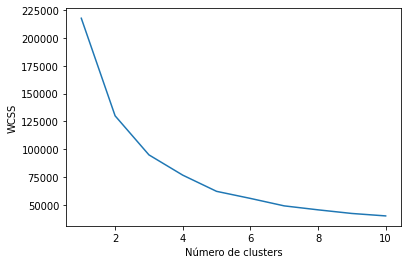

In [ ]:
plt.plot(range(1, 11), wcss) 
plt.xlabel('Número de clusters') 
plt.ylabel('WCSS') 
plt.show()

* Visualização com YellowBrick

[Documentação `elbow_visualizer`](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)


In [ ]:
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
kmeans_dados_elbow = KMeans(random_state=42)

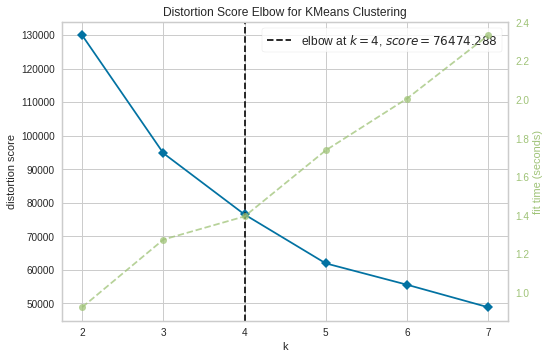

In [ ]:
#distorção: média das distâncias quadradas dos centros dos clusters dos respectivos clusters
grafico = KElbowVisualizer(kmeans_dados_elbow, k=(2,8))

grafico.fit(X_normalizado)        
grafico.show()        

In [ ]:
#rodar novamente 
kmeans_dados_final = KMeans(n_clusters = 4, random_state=42)
rotulos_kmeans_final = kmeans_dados_final.fit_predict(X_normalizado)

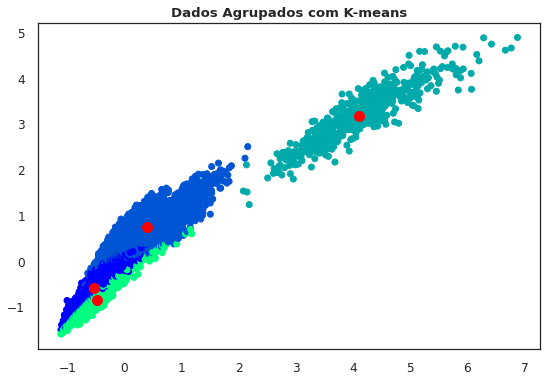

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=X_normalizado[:,0], y=X_normalizado[:, 2], c=rotulos_kmeans_final, cmap='winter')

#plot dos centroides
plt.scatter(kmeans_dados_final.cluster_centers_[:, 0], 
            kmeans_dados_final.cluster_centers_[:, 2], 
            s=100,                             
            c='red') 

plt.title('Dados Agrupados com K-means',fontweight='bold')
plt.show()

## Aula 3 - Análise de Agrupamento (parte 2)

### Vídeo 3.1 - O que é Mean Shift?

[Slides]

### Vídeo 3.2 - Aplicando o Mean Shift

* MeanShift

[Documentação Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift)

[Documentação `estimate_bandwidth`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html?highlight=bandwidth#sklearn.cluster.estimate_bandwidth)

* Dica de leitura: [Artigo científico - Mean shift: a robust approach toward feature space analysis](https://courses.csail.mit.edu/6.869/handouts/PAMIMeanshift.pdf)

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
bw = estimate_bandwidth(X_normalizado)

In [ ]:
meanshift_dados = MeanShift(bandwidth=bw).fit(X_normalizado)

In [ ]:
rotulos_meanshift = meanshift_dados.labels_
numero_rotulos = len(np.unique(rotulos_meanshift))
numero_rotulos

4

In [ ]:
cluster_centers = meanshift_dados.cluster_centers_
cluster_centers

array([[ -0.4789558 ,  -0.57366824,  -0.58841817,  -0.42756736,
         -0.42964784,  -0.28480431,  -0.48084559,  -0.5319751 ,
          0.12248386,   0.32496662,   0.54452886,   0.39271413,
          0.44264794,   0.51777696,   0.37457547,   0.38905475],
       [  4.04202451,   3.35871393,   3.13195302,   3.79875394,
         -0.01871732,   0.20020256,   4.02825102,   3.60773152,
          0.58606303,   0.13478125,  -0.1081938 ,  -0.09017692,
         -2.76073157,  -1.45046936,  -0.12046372,  -0.58259507],
       [ -0.61809068,  -0.18034875,  -0.72145327,  -0.45878373,
         -0.65305572,  -0.43329509,  -0.52986816,  -0.71302349,
         -0.76678946, -14.56945421,  -3.6158641 ,   0.26663429,
          0.73851951,   0.52044111,   0.23016791, -10.85036253],
       [ -0.71296496,   0.24725168,  -0.89407169,  -0.67041047,
         -0.68268286,  -0.47253771,  -0.66549065,  -0.85790121,
         -0.53453744,  -8.69256545,  -6.44620954,   0.49964137,
          0.89810019,   0.85515594,  

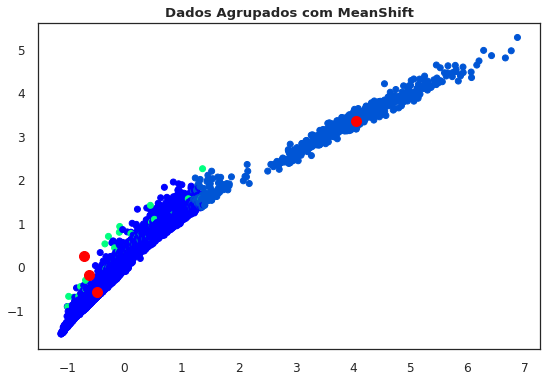

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=X_normalizado[:,0], y=X_normalizado[:, 1], c=rotulos_meanshift, cmap='winter')

#plot dos centroides
plt.scatter(meanshift_dados.cluster_centers_[:, 0], 
            meanshift_dados.cluster_centers_[:, 1], 
            s=100,                             
            c='red') 

plt.title('Dados Agrupados com MeanShift',fontweight='bold')
plt.show()

### Vídeo 3.3 - O que é DBSCAN?

[Slides]

### Vídeo 3.4 - Aplicando DBSCAN no problema

* DBSCAN

[Documentação Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
#realizar varios testes com os parametros `eps` e `min_samples`
dbscan = DBSCAN(eps=1.20, min_samples=2)

In [ ]:
dbscan_dados = dbscan.fit(X_normalizado)

In [ ]:
rotulos_dbscan = dbscan_dados.labels_
rotulos_dbscan

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(rotulos_dbscan, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([  265, 12794,     2,     3,     2,     3,     2,     2,   477,
            2,     2,     2,     5,     2,     2,     6,     6,     3,
            2,     3,     2,     3,     2,     2,     2,     2,     2,
            2,     2,     2,     3,     2]))

In [ ]:
numero_rotulos = len(np.unique(rotulos_dbscan))
numero_rotulos

32

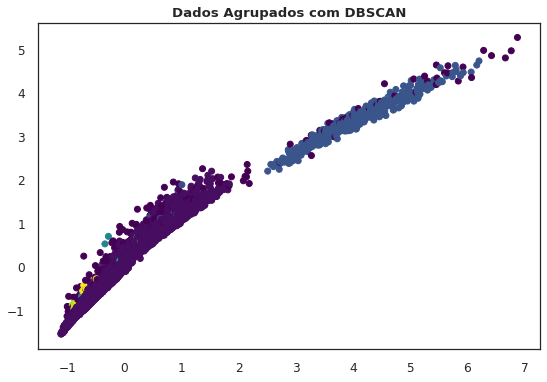

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=X_normalizado[:,0], y=X_normalizado[:, 1], c=rotulos_dbscan, cmap='viridis')

plt.title('Dados Agrupados com DBSCAN',fontweight='bold')
plt.show()

In [ ]:
#analisar clusters criados

## Aula 4 - Redução de Dimensionalidade


### Vídeo 4.1 - O que é Redução de Dimensionalidade?

[Slides]

* O que é Maldição da Dimensionalidade?

Fenômeno que ocorre quando temos uma grande quantidade de variáveis e muitas vezes são altamente correlacionadas ou não agregam informação útil ao problema que estamos lidando.

* Redução de dimensionalidade

Reduzir o número de características para que reduza o custo e a facilite o desenvolvimento de uma solução.


### Vídeo 4.2 - O que é PCA?

[Slides]

* Faremos uma simulação desta técnica a seguir, utilizando o problema da Indústria Pé-de-Feijão!

* O que é PCA (Principal Component Analysis)?

"A análise fatorial por componentes principais permite, portanto, que, a partir de um conjunto de variáveis originais correlacionadas entre si, seja determinado outro conjunto de variáveis (fatores) resultantes da combinação linear do primeiro conjunto."

* Dica de leitura: [Documentação Sklearn - Técnicas de Redução de Dimensionalidade](https://scikit-learn.org/stable/modules/decomposition.html#decompositions), [Capítulo 10 - Manual de Análise de Dados](https://www.google.com.br/books/edition/Manual_de_An%C3%A1lise_de_Dados/SmlaDwAAQBAJ?hl=pt-BR&gbpv=0)

### Vídeo 4.3 - Simulando PCA nos dados

In [ ]:
correlacao = dados_lab.corr()
correlacao

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


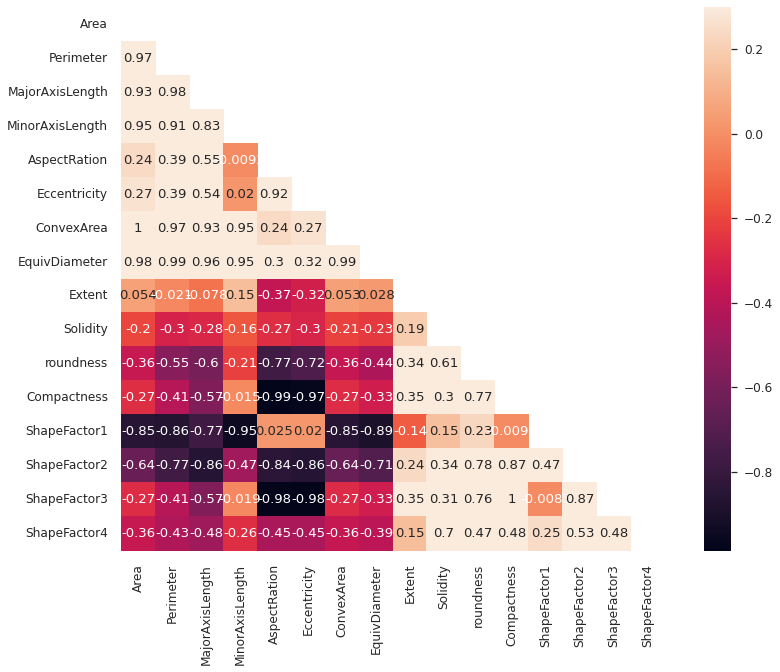

In [ ]:
#dica - modelo na documentação do seaborn
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(correlacao, mask=mask, vmax=.3, square=True, annot=True)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#testar diferentes valores para o `n_components` -> por padrão irá testar todos os componentes se não especificar
pca = PCA()

In [ ]:
pca_dados = pca.fit_transform(X_normalizado)

In [ ]:
#para sumprimir o uso de notações científicas
np.set_printoptions(precision = 2, suppress = True)

In [ ]:
pca.explained_variance_

array([8.88, 4.23, 1.28, 0.82, 0.44, 0.18, 0.11, 0.05, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
#percentual da variancia explicada
variancia_explicada = np.around(pca.explained_variance_ratio_, 2)*100

In [ ]:
variancia_explicada

array([55., 26.,  8.,  5.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

### Vídeo 4.4 - Simulando PCA nos dados com 3 componentes

In [ ]:
#utilizando 3 componentes que melhor explicam os dados
pca_2 = PCA(n_components=3)
pca_dados_2 = pca_2.fit_transform(X_normalizado)

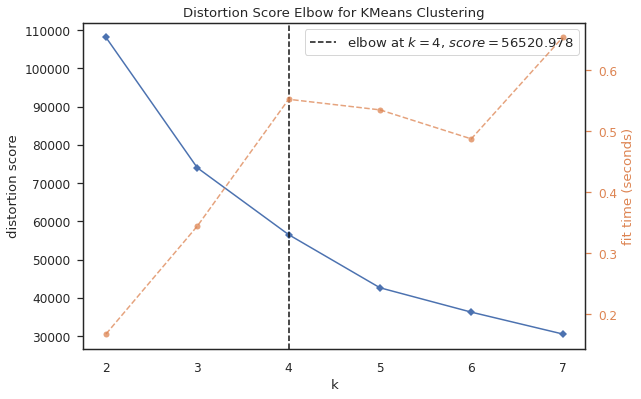

In [ ]:
#Elbow method
kmeans_dadospca_elbow = KMeans(random_state=42)

grafico = KElbowVisualizer(kmeans_dadospca_elbow, k=(2,8))
grafico.fit(pca_dados_2)        
grafico.show() 

In [ ]:
#K-means
kmeans_dados_pca = KMeans(n_clusters=4, random_state=42)
rotulos_kmeans_pca = kmeans_dados_pca.fit_predict(pca_dados_2)

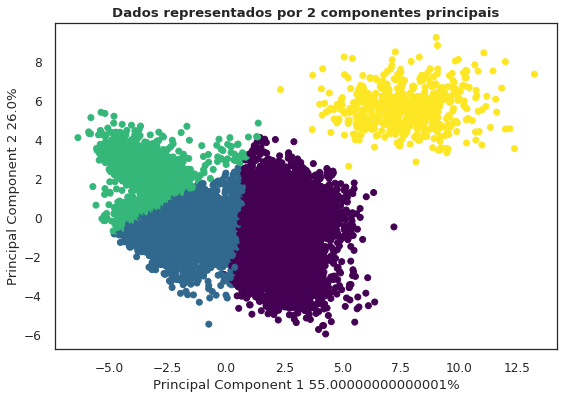

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)}, font_scale=1.1)

plt.scatter(x=pca_dados_2[:, 0], y=pca_dados_2[:, 1], c=rotulos_kmeans_pca, cmap='viridis')
plt.xlabel(f'Principal Component 1 {variancia_explicada[0]}%')
plt.ylabel(f'Principal Component 2 {variancia_explicada[1]}%')
plt.title('Dados representados por 2 componentes principais', fontweight='bold')
plt.show()